# Support Vector Machines

Support Vector Machines (or SVM) are a family of supervised learning models for classification or regression. SVM is part of the family of linear predictors, since it search for halfspaces able to separate the points. Moreover, the SVM algorithmic paradigm tackles the sample complexity challenge by searching for *large margin* separators.

## Hard-SVM
Givent a set of points $S = \{(\mathbf x_1, y_1), \ldots, (\mathbf x_m, y_m)\}$ we say that this points are linearly separable if there exists an halfspace $(\mathbf w, b)$ such that:

$$ \forall u\in[m],\quad y_i(\langle\mathbf w, \mathbf x_i\rangle+b) > 0 $$

For any separable training sample, there are many possible solutions. However we want to find the one that gives us the most reliable results.
We can formalize this intuition introducing the concept of *margin*

> The margin of an hyperplane with respect to a training set is defined as the minimal distance between a point in the training set and the hyperplane

**Hard-SVM** is the learning rule in which we return an ERM hyperplane that separates the training set with largest possible margin.
Mathematiccaly we can formalize this problem as:

$$ \underset{(\mathbf w, b):\|\mathbf w\|=1}{\arg\max} \underset{i\in[m]}{\min}|\langle\mathbf w, \mathbf x_i\rangle+b|\quad s.t. \quad \forall i\in[m],\quad y_i(\langle\mathbf w, \mathbf x_i\rangle+b) > 0$$

where $|\langle\mathbf w, \mathbf x_i\rangle+b|$ is the distance between point $\mathbf x_i$ and the hyperplane defined by $(\mathbf w, b)$. The formula simply tells us that we want to find the vector $\mathbf w$ of norm 1 that maximizes the minimum distance of a point from the corresponding hyperplane, such that all points are corretcly classified.

In the separable case we can write equivalently:

$$ \underset{(\mathbf w, b):\|\mathbf w\|=1}{\arg\max} \underset{i\in[m]}{\min}y_i(\langle\mathbf w, \mathbf x_i\rangle+b)$$


Finally, another semplification of the problem is done considering the homogeneous case, namely, considering halfspaces that pass through the origin point and thus omitting the bias term $b$. Note that we can reduce nonhomogeneous halfspaces adding the bias term to the weight vector and extending each sample with a symbolic entry of value 1:

$$ \mathbf w= (b, w_1, \ldots, w_d),\qquad \mathbf x_i = (1, x_{i,1 },\ldots, x_{d, 1}) $$

In this case the problem becomes simply:

$$ \underset{\mathbf w}{\min}\|\mathbf w\|^2\quad s.t.\quad \forall i\in[m],\quad y_i\langle\mathbf w, \mathbf x_i\rangle\ge 1$$

### Implementation
Another equivalent formulation of the same problem can by given in the form of a quadratic optimization problem

$$ \underset{(\mathbf w, b)}{\arg\min }\|\mathbf w\|^2 \quad s.t.\quad \forall i \in[m], \quad y_i(\langle\mathbf w, \mathbf x_i\rangle+b) > 0 $$

The idea is to fix the minimum margin to 1 and then using the vector $\mathbf w$ to scale the distances. Minimizing the squared norm (the length) of the vector, we practically maximize the distances and so the margins. Hence, solving this problem we have found the maximum margin halfspace

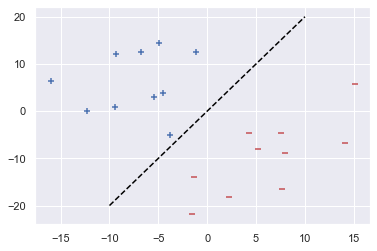

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

separating_line = lambda x: 2*x + 0

n_pos_points = 10
n_neg_points = 10

x_pos = np.array([(x - 15*np.random.rand(), separating_line(x) + 15*np.random.rand()) for x in np.random.randint(-5, 5, n_pos_points)])
x_neg = np.array([(x + 15*np.random.rand(), separating_line(x) - 15*np.random.rand())for x in np.random.randint(-5, 5, n_pos_points)])

plt.scatter(x_pos[:,0], x_pos[:,1], c='b', marker='+')
plt.scatter(x_neg[:,0], x_neg[:,1], c='r', marker='_')
plt.plot([-10,10], [separating_line(-10), separating_line(10)],  linestyle='--', color ='black')
plt.show()

X = np.vstack((x_pos, x_neg)) #points
y = np.hstack((np.ones(len(x_pos)), -1 * np.ones(len(x_neg)))) #labels


In [21]:
import scipy as sp
from scipy.optimize import LinearConstraint


class SVM():
    
    def fit(self, X, y):
        constraints = LinearConstraint(X*y[:,np.newaxis], np.ones(len(X)), np.full(len(X), np.inf))
        self.res = sp.optimize.minimize(sp.linalg.norm, np.random.rand(2),  constraints=[constraints])
        
    def transform(self, X):
        return np.sign(self.res.x @ X.T)

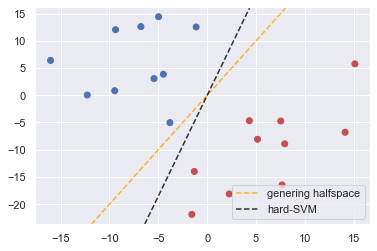

In [25]:
model = SVM()
model.fit(X, y)
y_pred = model.transform(X)

colors = ['b' if y == 1.0 else 'r' for y in y_pred ]
plt.scatter(X[:,0], X[:,1], c=colors)
# plt.plot([-10,10], [separating_line(-10), separating_line(10)],  linestyle='--', color ='black')
w = model.res.x
d = -w[0]/w[1]
plt.axline((0, 0), slope = 2,  linestyle='--', color='orange', alpha=0.8, label ='genering halfspace')
plt.axline((0, 0), slope = d,  linestyle='--', color='black', alpha=0.8, label ='hard-SVM')

plt.legend()


SyntaxError: invalid syntax (<ipython-input-46-f4745782f9e9>, line 3)

In [29]:
x = X[0]

In [31]:
w @ x

1.838699998436007

In [39]:
X.T @w

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 20)

In [43]:
1 - y*(X.dot(w))

array([-8.38699998e-01, -4.13413720e+00, -1.54958518e+00, -6.21938056e+00,
       -2.60591256e+00, -2.93848134e+00, -1.24806185e+00,  3.77475828e-15,
       -3.14279007e+00, -3.99480848e+00, -2.57820712e+00, -1.04360964e-14,
       -7.62710073e-01, -3.92341110e+00, -1.98251720e+00, -1.90774088e+00,
       -4.51055413e+00, -1.26493074e+00, -5.48207435e+00, -3.20325075e+00])

In [44]:
y*(X.dot(w))

array([1.8387    , 5.1341372 , 2.54958518, 7.21938056, 3.60591256,
       3.93848134, 2.24806185, 1.        , 4.14279007, 4.99480848,
       3.57820712, 1.        , 1.76271007, 4.9234111 , 2.9825172 ,
       2.90774088, 5.51055413, 2.26493074, 6.48207435, 4.20325075])

In [45]:
(X.dot(w))

array([ 1.8387    ,  5.1341372 ,  2.54958518,  7.21938056,  3.60591256,
        3.93848134,  2.24806185,  1.        ,  4.14279007,  4.99480848,
       -3.57820712, -1.        , -1.76271007, -4.9234111 , -2.9825172 ,
       -2.90774088, -5.51055413, -2.26493074, -6.48207435, -4.20325075])